## Data Science Final Project : Exploratory Data Analysis
### Group Members : Jiachang Shi, Boyuan Sun, Xiangru Shu

### Library Used

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from nltk.corpus import stopwords
from collections import Counter
%matplotlib inline

## Exploratory Data Analysis

In [52]:
imdb_movie = pd.read_csv('data/imdb_data.csv', index_col = 0)
tmdb_movie = pd.read_csv('data/tmdb_data.csv', index_col = 0)

In [53]:
imdb_movie.head()

,title,imdb_id,topRank,bottomRank,metaScore,plot,rating,ratingCount,reviewCount,runningTimeInMinutes,userRatingCount,userScore,year,all_genre,genre
0,"I, Tonya",tt5580036,930.0,17643.0,77.0,"{'outline': {'author': 'david_ash99', 'id': '/...",7.6,67667.0,46,120.0,235,7.8,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport
1,Cars 3,tt3606752,2256.0,11547.0,59.0,{'outline': {'id': '/title/tt3606752/plot/po21...,6.8,41896.0,41,102.0,232,6.9,2017.0,"['Animation', 'Adventure', 'Comedy', 'Family',...",sport
2,Creed,tt3076658,847.0,17840.0,82.0,"{'outline': {'author': 'Anonymous', 'id': '/ti...",7.6,193206.0,42,133.0,614,8.0,2015.0,"['Drama', 'Sport']",sport
3,Battle of the Sexes,tt4622512,2303.0,11228.0,73.0,{'outline': {'author': 'Fox Searchlight Pictur...,6.8,27960.0,46,121.0,102,6.3,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport
4,Borg McEnroe,tt5727282,NaN,12891.0,57.0,"{'outline': {'author': 'Anonymous', 'id': '/ti...",7.0,9800.0,13,107.0,0,NaN,2017.0,"['Biography', 'Drama', 'Sport']",sport


In [54]:
tmdb_movie.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/jDai0rdlBHhcY8vpJ4XmTIDQU5i.jpg,[18],389015,en,"I, Tonya",Competitive ice skater Tonya Harding rises amo...,34.312342,/6gNXwSHxaksR1PjVZRqNapmkgj3.jpg,2017-12-08,"I, Tonya",False,7.5,930
1,False,/36h3Sw4y4COqMeNg31ST0h5xRae.jpg,"[12, 16, 35, 10751]",260514,en,Cars 3,Blindsided by a new generation of blazing-fast...,29.586654,/fyy1nDC8wm553FCiBDojkJmKLCs.jpg,2017-06-15,Cars 3,False,6.8,1441
2,False,/nF4kmc4gDRQU4OJiJgk6sZtbJbl.jpg,[18],312221,en,Creed,The former World Heavyweight Champion Rocky Ba...,30.031372,/hKzhV274pkZBSpXfCjUyzbyYKLl.jpg,2015-11-25,Creed,False,7.3,2569
3,False,/eR5335pOlOpY0sNsmKmuJJG4MnU.jpg,"[35, 18, 36]",369192,en,Battle of the Sexes,The true story of the 1973 tennis match betwee...,15.467041,/fWy0A3VojTCb0S2MKtEJjpquubF.jpg,2017-09-22,Battle of the Sexes,False,7.0,516
4,False,/rfhnEYubWD4hnUUm8xXmotpqffb.jpg,"[28, 12, 18, 10751]",38575,en,The Karate Kid,12-year-old Dre Parker could have been the mos...,13.104559,/l13emtM0cz0HyJeWSxb6ml5RvzT.jpg,2010-06-10,The Karate Kid,False,6.2,2108


#### drop rows where there is no plot description found in the imdb database

In [55]:
sum(imdb_movie['plot'].isnull())

13

In [56]:
imdb_movie = imdb_movie.dropna(subset = ['plot'])

In [57]:
sum(imdb_movie['plot'].isnull())

0

#### plot string cleaning

In [58]:
def plot_cleaning(plot_str, all_plots = True):
    """ Function to clean up the string representation of dictionary documenting the plot in the plot field in the
        dataframe
    INPUTS
    ------
    plot_str: string representation of a dictionary scrape from imdb
    all_plots : True if all the plot description from every author is wanted
                False if only the longest plot description is wanted
    OUTPUTS
    -------
    str representation of the plot
    """
    plot_dict = ast.literal_eval(plot_str)
    plot_str = ''
    
    if 'summaries' in plot_dict:
        plot_summary = plot_dict['summaries']
    else:
        plot_summary = [{'text':plot_dict['outline']['text']}]
    # parse the dictionary
    if all_plots:
        for i in range(len(plot_summary)):
            plot_str += plot_summary[i]['text'] + '\n'
    else:
        max_len = 0
        for i in range(len(plot_summary)):
            cur_text = plot_summary[i]['text']
            if len(cur_text) > max_len:
                plot_str = cur_text
                max_len = len(cur_text)
    return plot_str

In [59]:
imdb_movie['plot'] = imdb_movie['plot'].apply(plot_cleaning)

In [60]:
imdb_movie.head()

,title,imdb_id,topRank,bottomRank,metaScore,plot,rating,ratingCount,reviewCount,runningTimeInMinutes,userRatingCount,userScore,year,all_genre,genre
0,"I, Tonya",tt5580036,930.0,17643.0,77.0,From the proverbial wrong side of the tracks i...,7.6,67667.0,46,120.0,235,7.8,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport
1,Cars 3,tt3606752,2256.0,11547.0,59.0,Blindsided by a new generation of blazing-fast...,6.8,41896.0,41,102.0,232,6.9,2017.0,"['Animation', 'Adventure', 'Comedy', 'Family',...",sport
2,Creed,tt3076658,847.0,17840.0,82.0,Adonis Johnson is the son of the famous boxing...,7.6,193206.0,42,133.0,614,8.0,2015.0,"['Drama', 'Sport']",sport
3,Battle of the Sexes,tt4622512,2303.0,11228.0,73.0,In the wake of the sexual revolution and the r...,6.8,27960.0,46,121.0,102,6.3,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport
4,Borg McEnroe,tt5727282,NaN,12891.0,57.0,The story of the 1980s tennis rivalry between ...,7.0,9800.0,13,107.0,0,NaN,2017.0,"['Biography', 'Drama', 'Sport']",sport


In [61]:
imdb_movie['plot_list'] = imdb_movie['plot'].apply(lambda x: x.split())

In [62]:
imdb_movie.head()

,title,imdb_id,topRank,bottomRank,metaScore,plot,rating,ratingCount,reviewCount,runningTimeInMinutes,userRatingCount,userScore,year,all_genre,genre,plot_list
0,"I, Tonya",tt5580036,930.0,17643.0,77.0,From the proverbial wrong side of the tracks i...,7.6,67667.0,46,120.0,235,7.8,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport,"[From, the, proverbial, wrong, side, of, the, ..."
1,Cars 3,tt3606752,2256.0,11547.0,59.0,Blindsided by a new generation of blazing-fast...,6.8,41896.0,41,102.0,232,6.9,2017.0,"['Animation', 'Adventure', 'Comedy', 'Family',...",sport,"[Blindsided, by, a, new, generation, of, blazi..."
2,Creed,tt3076658,847.0,17840.0,82.0,Adonis Johnson is the son of the famous boxing...,7.6,193206.0,42,133.0,614,8.0,2015.0,"['Drama', 'Sport']",sport,"[Adonis, Johnson, is, the, son, of, the, famou..."
3,Battle of the Sexes,tt4622512,2303.0,11228.0,73.0,In the wake of the sexual revolution and the r...,6.8,27960.0,46,121.0,102,6.3,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport,"[In, the, wake, of, the, sexual, revolution, a..."
4,Borg McEnroe,tt5727282,NaN,12891.0,57.0,The story of the 1980s tennis rivalry between ...,7.0,9800.0,13,107.0,0,NaN,2017.0,"['Biography', 'Drama', 'Sport']",sport,"[The, story, of, the, 1980s, tennis, rivalry, ..."


#### visualization of length of the plot description in each genre

In [66]:
genre_names = []
avg_plot_len = []
std_plot_len = []
for name, grouped in imdb_movie.groupby('genre'):
    genre_names.append(name)
    avg_plot_len.append(np.mean(grouped['plot_list'].apply(len)))
    std_plot_len.append(np.std(grouped['plot_list'].apply(len)))

In [67]:
avg_plot_len = np.array(avg_plot_len)
std_plot_len = np.array(std_plot_len)

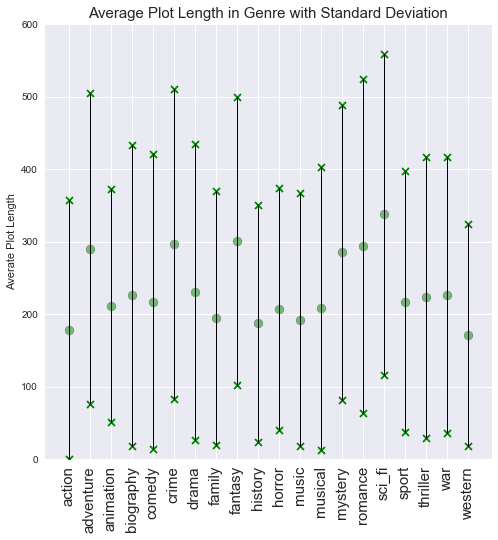

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8));
ax.scatter(np.arange(len(genre_names)), avg_plot_len, alpha = 0.5, s = 80, edgecolor = 'black', facecolor = 'green');
ax.vlines(np.arange(len(genre_names)), avg_plot_len - std_plot_len, avg_plot_len + std_plot_len, linewidth = 1);
ax.scatter(np.arange(len(genre_names)), avg_plot_len - std_plot_len, marker = 'x', color = 'green');
ax.scatter(np.arange(len(genre_names)), avg_plot_len + std_plot_len, marker = 'x', color = 'green');
ax.set_xticks(np.arange(len(genre_names)));
ax.set_xticklabels(genre_names, rotation = 90, fontsize = 15);
ax.set_ylim([0, 600]);
ax.set_ylabel('Averate Plot Length')
ax.set_title('Average Plot Length in Genre with Standard Deviation', fontsize = 15);

#### visualization of the most frequent words in each genre

In [35]:
stopwords_set = set(stopwords.words('english'))

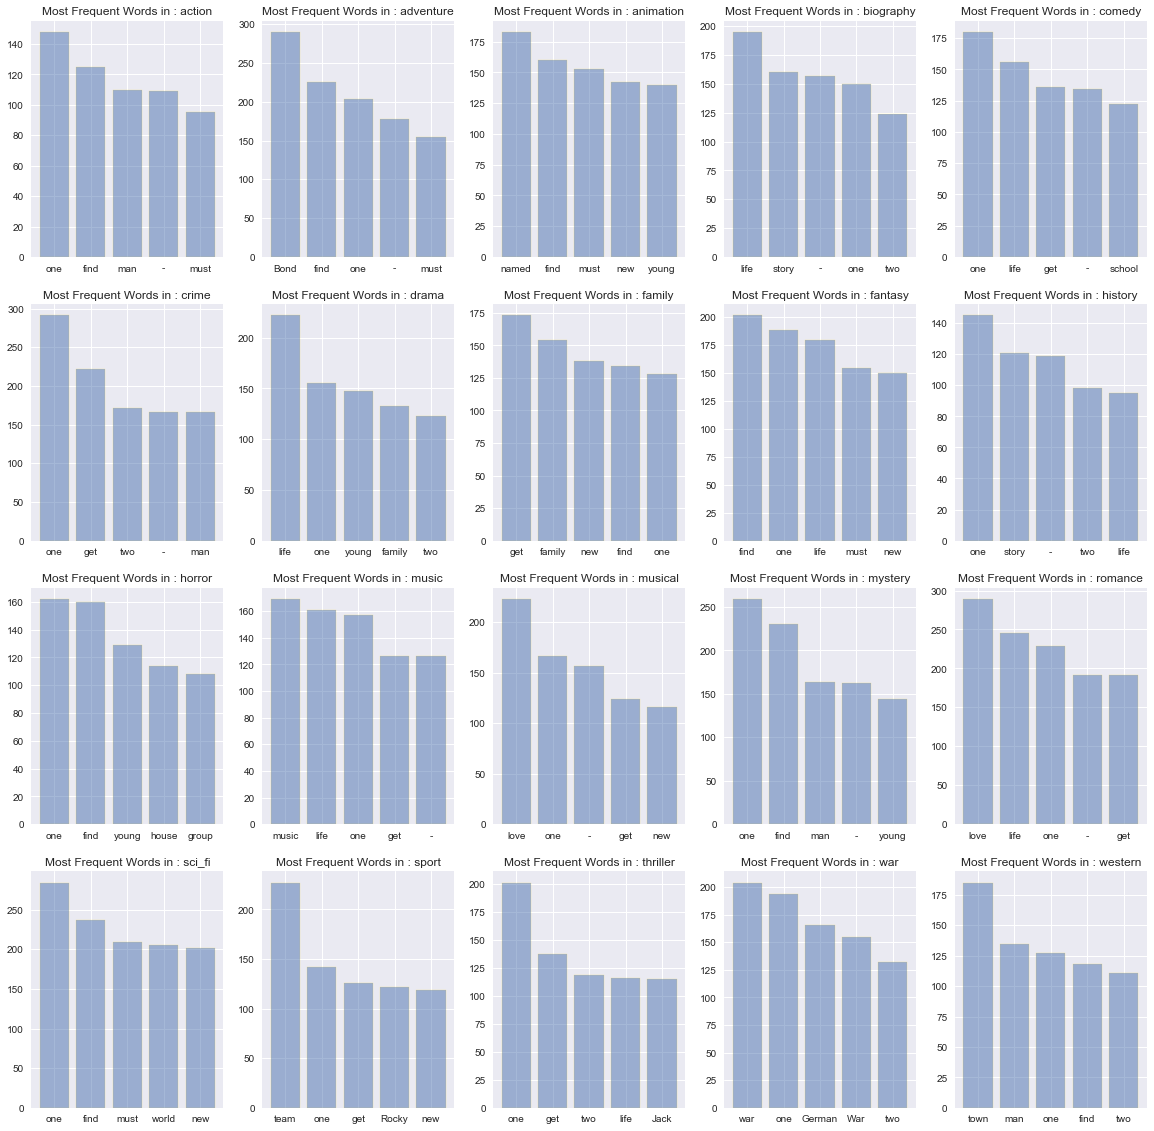

In [124]:
fig, ax = plt.subplots(4, 5, figsize = (20, 20))
ax = ax.flatten()
for index, genre_name in enumerate(genre_names):
    
    # group the df by genre
    cur_df = imdb_movie[imdb_movie['genre'] == genre_name]
    
    # count the number of occurances of each word
    counter = Counter(word for sublist in cur_df['plot_list'] for word in sublist if word.lower() not in stopwords_set)
    
    # visualize name of the top words and count in each genre
    labels, counts = zip(*counter.most_common(5))
    ax[index].bar(np.arange(5), counts, edgecolor = 'gold', alpha = 0.5)
    ax[index].set_title('Most Frequent Words in : ' + str(genre_name))
    ax[index].set_xticks(np.arange(len(labels)));
    ax[index].set_xticklabels(labels, fontsize = 10);

#### Genre Histogram : balanced - genre dataset

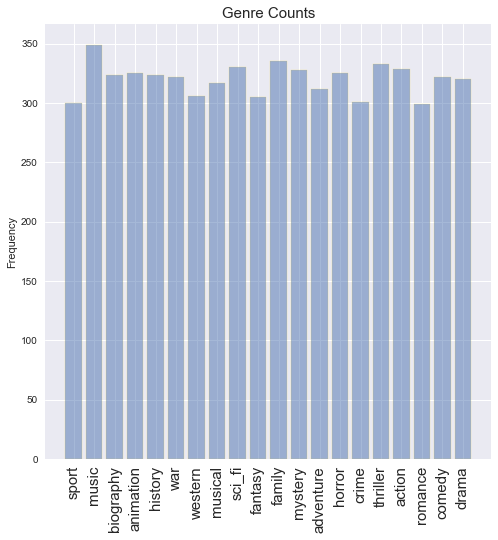

In [14]:
from collections import Counter
fig, ax = plt.subplots(figsize = (8, 8))
genre_counter = Counter(imdb_movie.genre)
ax.bar(np.arange(len(genre_counter)), genre_counter.values(), alpha = 0.5, edgecolor = 'gold');
ax.set_xticks(np.arange(len(genre_counter)));
ax.set_xticklabels(list(genre_counter.keys()), rotation = 90, fontsize = 15);
ax.set_ylabel('Frequency')
ax.set_title('Genre Counts', fontsize = 15);

## Baseline Model - Naive Bayes 

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### code the genre and vectorize the plot

In [24]:
naive_X_train, naive_X_test, naive_y_train, naive_y_test = train_test_split(imdb_movie['plot'], 
                                                                            imdb_movie['genre'],
                                                                            test_size = 0.2,
                                                                            random_state = 209,
                                                                            stratify = imdb_movie['genre'])

In [25]:
genre_dict = dict(zip(naive_y_train.unique(), range(len(naive_X_test.unique()))))

In [26]:
imdb_movie['genre_code'] = imdb_movie.genre.replace(genre_dict).values

In [28]:
imdb_movie.head(3)

,title,imdb_id,topRank,bottomRank,metaScore,plot,rating,ratingCount,reviewCount,runningTimeInMinutes,userRatingCount,userScore,year,all_genre,genre,genre_code
0,"I, Tonya",tt5580036,930.0,17643.0,77.0,From the proverbial wrong side of the tracks i...,7.6,67667.0,46,120.0,235,7.8,2017.0,"['Biography', 'Comedy', 'Drama', 'Sport']",sport,8
1,Cars 3,tt3606752,2256.0,11547.0,59.0,Blindsided by a new generation of blazing-fast...,6.8,41896.0,41,102.0,232,6.9,2017.0,"['Animation', 'Adventure', 'Comedy', 'Family',...",sport,8
2,Creed,tt3076658,847.0,17840.0,82.0,Adonis Johnson is the son of the famous boxing...,7.6,193206.0,42,133.0,614,8.0,2015.0,"['Drama', 'Sport']",sport,8


In [29]:
vectorizer = CountVectorizer()

In [30]:
naive_X_train = vectorizer.fit_transform(naive_X_train)
naive_X_test = vectorizer.transform(naive_X_test)

### Construct the Naive Bayes Model

In [31]:
nb_tuning_parameter = {'alpha' : [0.1, 0.5, 1, 2, 5]}
nb = GridSearchCV(MultinomialNB(), nb_tuning_parameter, cv = 5)
nb.fit(naive_X_train, naive_y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.5, 1, 2, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [32]:
naive_train_pred = nb.predict(naive_X_train)
naive_test_pred = nb.predict(naive_X_test)
print('Naive Bayes Accuracy on Train : {}'.format(metrics.accuracy_score(naive_y_train, naive_train_pred)))
print('Naive Bayes Accuracy on Test : {}'.format(metrics.accuracy_score(naive_y_test, naive_test_pred)))

Naive Bayes Accuracy on Train : 0.9580405932864949
Naive Bayes Accuracy on Test : 0.3790951638065523
